# Perceptrón

En las redes neuronales, los pesos pueden interpretarse como la fuerza de las conexiones que unen dos neuronas entre sí. De esta forma, los pesos de la red neurona determinan cómo se comportará ésta cuando reciba un vector de entrada: de los pesos depende la clase a la que pertenecerá el ejemplo de entrada.

Sin duda, cuanto más compleja sea la red, más compleja será la interpretación de las interacciones de las neuronas a través de los pesos. Aquí presentamos un ejemplo simple: el perceptrón. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Preparación de los datos

Una parte immportante de toda red neuronal son los datos con los que va a entrenarse. Estos datos le ayudarán a ajustar sus parámetros (pesos) y, de esta forma, crear una función capaz de generalizar la tarea que ha aprendido.

Los datos pueden verse como vectores aleatorios; es decir, como vectores cuyas entradas son variables aleatorias. Así, un vector aleatorio se ve como:

$$X^T = [X_1, X_2, ..., X_n]$$

donde $X_i$, para toda $i=1,...,n$, es una variable aleatoria. Cuando muestreamos los ejemplos, esperamos que estos sean iid (idependientes e idénticamente distribuidos); esto implica que cada vector ejemplo $X$ no depende de ningún otro ejemplo en el dataset. Nuestro objetivo, entonces es determinar el valor que una variable $Y$ puede tomar dado que conocemos el vector $X$. Este problema se puede plantear como:

$$\hat{y} = \arg\max_y p(Y=y|X_1,X_2,...,X_n)$$

En el ejemplo que planteamos a continuación, elegimos variables que aleatorias $X_1, X_2, ..., X_7$ que responden a preguntas que pueden responderse como sí o no. Así, $X_1$ es una variable que codifica la pregunta "¿es animal?": si la respuesta es sí, se coloca un 1, si es no se coloca un 0. 

Finalmente, la variable $Y$ representa la pregunta "¿es gato?". De esta forma, buscamos definir un modelo que nos pueda decir, a partir de las variables $X_1, X_2, ..., _X7$ si el objeto que porta estas variables es o no un gato.

In [2]:
data = pd.read_csv('cat_data.csv')
data

,¿es animal?,¿es mamífero?,¿es felino?,¿es doméstico?,¿tiene dos orejas?,¿es negro?,¿tiene cuatro patas?,¿es gato?
0,1,1,1,1,1,1,1,1
1,0,0,0,1,0,1,0,0
2,1,0,1,1,0,1,1,0
3,1,1,0,1,1,0,1,0
4,1,1,1,0,1,0,1,0
5,1,1,1,1,0,0,0,1
6,1,0,0,1,1,1,0,0
7,1,1,1,1,0,0,1,1
8,1,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0


Para preparar los ejemplos, debemos separar  las clases. Nuestros datos están estructurados como $X_1, X_2, ..., X_7, Y$. Bastará entonces guardar los datos de la variable $Y$ para cada ejemplo de entrada. Asimismo, conviene guardar el número de ejemplos y el numero de variables (7), pues será información que ocuparemos posteriormente.

In [3]:
#Convertir los datos a numpy
npData = data.to_numpy()
#Ejemplos
X = npData[:,:-1]
#Clases de los ejemplos
Y = npData[:,-1]

#Tamaño de los datos
#Unidades de entrada
m,n = X.shape

De los ejemplos hemos, entonces, aislado la clase a la que pertenecen (si son o no gatos) y conservado sólo la información sobre las variables $X_1, X_2,...,X_7$ que conformarán los vectores $X$ de entrenamiento.

In [4]:
#Ejemplos
pd.DataFrame(X, columns=list(data.columns)[:-1])

,¿es animal?,¿es mamífero?,¿es felino?,¿es doméstico?,¿tiene dos orejas?,¿es negro?,¿tiene cuatro patas?
0,1,1,1,1,1,1,1
1,0,0,0,1,0,1,0
2,1,0,1,1,0,1,1
3,1,1,0,1,1,0,1
4,1,1,1,0,1,0,1
5,1,1,1,1,0,0,0
6,1,0,0,1,1,1,0
7,1,1,1,1,0,0,1
8,1,0,0,1,0,0,0
9,0,0,0,0,0,0,0


In [5]:
#Clases
pd.DataFrame(Y, columns=['¿es gato?'])

,¿es gato?
0,1
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,0
9,0


#### Visualización de los ejemplos

En su calidad de vecotres, podemos visualizar cómo se comportan en un espacio vectorial. Para esto, utilizamos una técnica de reducción de dimensionadlida, PCA. Si bien los vectores no parecen linealmente separables, se verá al aplicar el perceptrón que, en su espacio oroginial, existe un hiperplano capaz de separar estos datos. Esto depende en gran medida de la selección de las variables aleatorias que definen los ejemplos.

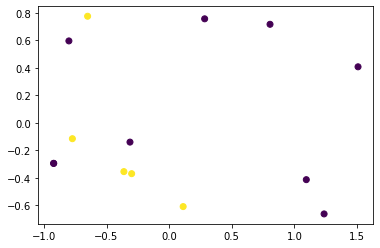

In [6]:
RedX = PCA(2).fit_transform(X)
plt.scatter(RedX[:,0], RedX[:,1], c=Y)
plt.show()

#### Exploración de los datos

En tanto son variables aleatorias, podemos obtener estadísticas de éstas para describir nuestros datos. Ya que estas variables representan preguntas de sí y no, y que plasmamos enstos con 0 y 1, podemos ver que estas variables tienen distribución Bernoulli; es decir: 

$$X_i \sim Ber(p_i)$$

Es decir, son variables distribuidas de forma similar, aunque esto no siempre es así (por ejemplo, una de estas variables podría medir el tamaño en centímetros). Aquí $p_i$ es el parámetro de la distribución que puede estimarse por medio de la media empírica. Así, podemos describir cada una de estas variables.

In [7]:
data.describe()

,¿es animal?,¿es mamífero?,¿es felino?,¿es doméstico?,¿tiene dos orejas?,¿es negro?,¿tiene cuatro patas?,¿es gato?
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.857143,0.642857,0.642857,0.714286,0.571429,0.357143,0.571429,0.357143
std,0.363137,0.497245,0.497245,0.468807,0.513553,0.497245,0.513553,0.497245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Por ejemplo $X_1$ que representa a la pregunta "¿es animal?" tiene una probabilidad (media empírica de las distribución Bernoulli) de 0.85. Esto no es raro, pues la mayoria de los ejemplos son gatos. Por su parte, la varibale $Y$ de "¿es gato?" tiene una probabilidad de 0.35, lo cual no es ideal, pues muchas veces se busca que se tenga un número igual de datos positivos como negativos. 

Ahora bien, ya hemos determinado que las variables muestran todas una misma distribución. Pero también podemos ver su nivel de dependencia. Para esto utilizaremos  una estadística de correlación. Podemos utilizar la correlación de Pearson, dada por:

$$\rho(X_i, X_j) = \frac{Cov(X_i, X_j) }{\sigma_i \cdot \sigma_j}$$

Donde $Cov()$ es la covariancia, y $\sigma_i, \sigma_j$ son las desviaciones estándar de las variables.

In [8]:
data.corr('pearson')

,¿es animal?,¿es mamífero?,¿es felino?,¿es doméstico?,¿tiene dos orejas?,¿es negro?,¿tiene cuatro patas?,¿es gato?
¿es animal?,1.000000,0.547723,0.547723,0.193649,0.471405,-0.121716,0.471405,0.304290
¿es mamífero?,0.547723,1.000000,0.688889,-0.141421,0.559431,-0.377778,0.559431,0.555556
¿es felino?,0.547723,0.688889,1.000000,-0.141421,0.258199,-0.066667,0.559431,0.555556
¿es doméstico?,0.193649,-0.141421,-0.141421,1.000000,-0.228218,0.141421,-0.228218,0.471405
¿tiene dos orejas?,0.471405,0.559431,0.258199,-0.228218,1.000000,0.043033,0.416667,0.043033
¿es negro?,-0.121716,-0.377778,-0.066667,0.141421,0.043033,1.000000,0.043033,-0.244444
¿tiene cuatro patas?,0.471405,0.559431,0.559431,-0.228218,0.416667,0.043033,1.000000,0.043033
¿es gato?,0.304290,0.555556,0.555556,0.471405,0.043033,-0.244444,0.043033,1.000000


La diagonal siempre será 1, pues es la correlación entre la variable y sí misma. Podemos ver que, por ejemplo, ¿es animal? tiene una corralación baja con ¿es negro? y con ¿es doméstico?. Por otra parte, ¿es animal? tiene una correlación alta con ¿es mamífero? y ¿es felino?, lo que no es raro, pues para que se den estas dos últimas variables debe presentarse primero la de animal (pues no hay felinos que no sean animales).

Los más importante aquí es notar las correlaciones con la variable $Y$ ¿es gato?: Podemos observar que las correlaciones más altas se dan con ¿es animal?, ¿es mamífero?, ¿es felino? y ¿es doméstico? (de las cuáles la más baja es con ¿es animal? y las más altas con ¿es mamífero? y ¿es felino?). Esto nos indica que son estas variables las que pueden influenciar más en la decisión de si el objeto es un gato o no. Esperamos, entonces, que en una red neuronal, las conexiones con estas variables sean altas.

## Aplicación del algoritmo del perceptrón

El perceptrón es un algoritmo de aprendizaje estadístico que busca estimar las clases de un conjunto de datos a partir de la función de decisión:

$$f(x; \theta) = \begin{cases} 1 & \text{ si } wx + b > 0 \\ 0 & \text{ si } wx + b \leq 0\end{cases}$$

Aquí $x$ es un vector de entrada. La función f depende de $\theta = {w,b}$ que representa los parámetros o los pesos de la red: $w$ contienen los pesos de las conexiones y $b$ es el bias. Definimos esta función a continuación:

In [9]:
#Función de decisión
f = lambda x, theta: (np.dot(x,theta) >= 0).astype(np.int)

#### Algoritmo del perceptrón

El objetivo del algoritmo del perceptrón es obtener los parámetros $\theta$ adecuados para que la red pueda clasificar adecuadamente los ejemplos. Este algoritmo es iterativo y busca minimizar el cuánto se equivoca la red en cada paso. 

Antes de entrar de lleno al este algoritmo, agregaremos una columna más a la matriz de datos de entrenamiento; esto con el objetivo de que esta columna represente el bias, de tal forma que sólo actualicemos sobre un vector de parámetros:

In [10]:
#Se agrega una columna para bias
X1 = np.append(X,np.ones((m,1)),axis=1)

Para inicializar el algoritmo del perceptron, tomaremos un vector $w \in \mathbb{R}^{n+1}$, donde $n$ es el número de variables (la dimensión de los vectores ejemplos) y el $+1$ responde al bias. Asimismo, estableceremos un número máximo de iteraciones (en caso de que el algoritmo no sea capaz de minimizar el error) y, finalmente, estableceremos un rango de aprendizaje.

In [11]:
#Parámetros
w = np.ones(n+1)

#Núm. max de iteraciones
its = 100
#Learning rate
lr = 0.1

Para entrenar la red, utilizaremos el algoritmo del perceptrón. Este consta de dos partes:

* Forward. Para cada ejemplo $x$, se computará la función $f(x; \theta)$
* Backward. Se actualizarán los pesos de $\theta = {w,b}$ por medio de la regla: $$w_i \leftarrow w_i - \eta (f(x;\theta)-y_x)x_i$$ Donde $y_x$ es la clase a la que pertenence el ejemplo $x$.

El algoritmo iterará hasta que el error $f(x; \theta) -y$ sea 0 o cuando se cumpla el número máximo de iteraciones.

In [12]:
#Detenerse
stop = False
t = 0
while  stop == False:
    #FORWARD
    #Funcion de prediccion
    pred = f(X1,w) 
    #Error
    err =  pred - Y
    
    #ACTUALIZACIÓN
    #Gradiente descendiente
    w -= lr*((X1.T * err).T).sum(0)
    
    print('Estado', t, '\t prediccion', pred, '\t', end=" ")
    print('parametros', np.round(w,3))
    
    t += 1
    #Criterio de paro
    if (pred - Y).sum(0) == 0 or t > its: 
        stop = True

Estado 0 	 prediccion [1 1 1 1 1 1 1 1 1 1 1 1 1 1] 	 parametros [0.3 0.6 0.6 0.5 0.5 0.6 0.5 0.1]
Estado 1 	 prediccion [1 1 1 1 1 1 1 1 1 1 1 1 1 1] 	 parametros [-0.4  0.2  0.2  0.   0.   0.2  0.  -0.8]
Estado 2 	 prediccion [0 0 0 0 0 0 0 0 0 0 0 0 0 0] 	 parametros [ 0.1  0.7  0.7  0.5  0.3  0.3  0.3 -0.3]
Estado 3 	 prediccion [1 1 1 1 1 1 1 1 1 0 1 1 1 1] 	 parametros [-0.6  0.3  0.3  0.  -0.2 -0.1 -0.2 -1.1]
Estado 4 	 prediccion [0 0 0 0 0 0 0 0 0 0 0 0 0 0] 	 parametros [-0.1  0.8  0.8  0.5  0.1 -0.   0.1 -0.6]
Estado 5 	 prediccion [1 0 1 1 1 1 0 1 0 0 1 1 1 1] 	 parametros [-0.6  0.4  0.4  0.3 -0.3 -0.2 -0.4 -1.1]
Estado 6 	 prediccion [0 0 0 0 0 0 0 0 0 0 0 0 0 0] 	 parametros [-0.1  0.9  0.9  0.8  0.  -0.1 -0.1 -0.6]
Estado 7 	 prediccion [1 1 1 1 1 1 0 1 1 0 1 1 1 1] 	 parametros [-0.7  0.5  0.5  0.4 -0.4 -0.4 -0.6 -1.3]
Estado 8 	 prediccion [0 0 0 0 0 0 0 0 0 0 0 0 0 0] 	 parametros [-0.2  1.   1.   0.9 -0.1 -0.3 -0.3 -0.8]
Estado 9 	 prediccion [1 0 1 1 1 1 0 1 0 0 1 

#### Exploración de la red

El perceptrón es un algoritmo que, por su simplicidad, es fácilmente interpretable. Dado que los ejemplos positivos (aquellos que sí son gatos) tienen que ser mayores a 0, mientras que los negativos serán menores a 0, el algoritmo otorga a las variables que influyen más en una desición positiva valores negativos; es decir, las conexiones que ayudan a discriminar si el vector de entrada describe un gato son conexiones fuertes (positivas), mientras que las que influyen negativamente tendrás conexiones negativas. Podemos observar entonces que peso se asigna en la red a cada variable.

In [13]:
pd.DataFrame(w.reshape(1,8), columns=list(data.columns)[:-1]+['bias'], index=['pesos'])

,¿es animal?,¿es mamífero?,¿es felino?,¿es doméstico?,¿tiene dos orejas?,¿es negro?,¿tiene cuatro patas?,bias
pesos,-0.4,1.1,1.1,1.3,-0.3,-0.5,-0.7,-1.0


Vemos que las variables que tienen pesos positivos son "mamífero", "felino" y "doméstico" características propias de la clase "gato" (clase 1). Las otras variables tienen pesos negativos, pues influyen poco en la decisión. Estos pesos tienen una relación con las correlaciones arriba presentadas. Las variables que msotraban una correlación mayor con la variable $Y$ ("¿es gato?") son precisamente  las que tienen mayores pesos aquí.

### Inferencia de probabilidades con perceptrón (regresión logística)

Como hemos señalado más arriba, el problema de de clasificación puede formalizarse como:

$$\hat{y} = \arg\max_y p(Y=y|X_1,...,X_n)$$

Sin embargo, en el algoritmo del perceptrón no hemos estimado ninguna probabilidad, sólo hemos decidido a partir de la fuerza del estímulo (si este es mayor a 0 se toma la clase 1, si es menor la clase 0). Con los parámetros aprendidos, podemos ver cómo se comportan los datos con respecto a esta decisión. Para esto mapearemos los escalares $wx+b$ en el eje $x$, mientras que en el eje $y$ se tienen las clases.

En este sentido, el perceptrón tiene una amplia relación con la <b>regresión logística</b>, con la diferencia de eque este último modelo se enfoca en estimar probabilidades, mientras que el perceptrón en clasificar. Sin embargo, los pesos que se aprenden bajo un modelo pueden utilizarse en el otro.

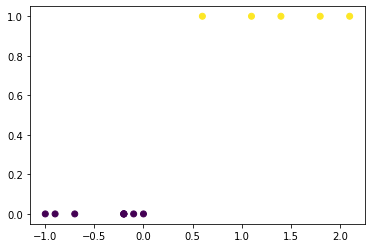

In [14]:
#Ploteo de la calsificación del perceptrón
plt.scatter(np.dot(X1,w), Y, c=Y)
plt.show()

En este caso, el perceptrón puede clasificar sin equivocarse estos datos de entrenamiento. Por tanto, todos los puntos de la clase 1 están arriba, mientras que los de la clase 0 abajo. Si bien no se equivoca, los puntos más cercanos a 0 son los más dificiles de decidir. En este sentido, se tiene mayor certeza cuando el punto está más alejado del 0, pues es claro que entre más positivo sea un caso con más certeza se puede asegurar que es de la clase 1. En sentido estricto, diremos que es más probable que pertenezca a la clase 1. Por tanto, estipulamos que podemos definir una función de probabilidad que nos diga esto. Para esto, debemos buscar una función suave que aproxime la posición de los datos. La función que buscamos es la función sigmoide, y esta dada por:

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [15]:
#Función sigmoide
sig = lambda x: 1./(1.+np.exp(-x))

A partir de esta función podemos aproximar la clasificación del perceptrón de manera suave. Esta función tiene una forma de S, a continuación podemos ver cómo se comporta:

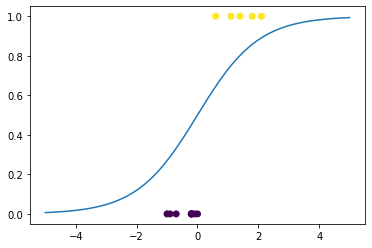

In [16]:
#Sigmoide
sig_data = np.array([sig(k) for  k in np.linspace(-5,5)])
#Ploteo del sigmoide con relación a la clasificación del perceptrón
plt.plot(np.linspace(-5,5), sig_data)
plt.scatter(np.dot(X1,w), Y, c=Y)
plt.show()

Podemos reducir el sigmoide a la escala de los datos, para ver cómo se comporta en relación a estos:

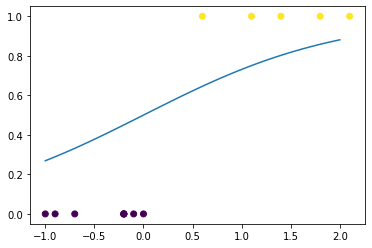

In [17]:
#Sigmoide escala de los datos
sig_data = np.array([sig(k) for  k in np.linspace(-1,2)])
#Ploteo del sigmoide con relación a la clasificación del perceptrón
plt.plot(np.linspace(-1,2), sig_data)
plt.scatter(np.dot(X1,w), Y, c=Y)
plt.show()

Está función tiene las proiedades siguientes:

* Es continua y derivable derivable
* Converge a 1 cuando $x\to\infty$
* Converge a 0 cuando $x\to -\infty$

En este sentido es una función con valores en $[0,1]$. Tomaremos al sigmoide como una función de probabilidad. En este sentido, la estimación de probabilidad a aprtir del perceptrón puede verse como:

$$p(Y=1|x) = \sigma(wx+b)$$

Por su  parte, la probabilidad de la clase negatica está dada por:

$$p(Y=0|x) = 1-\sigma(wx+b) = \sigma(-wx-b)$$

Esto euivale a proyectar los puntos obtenidos con la preactivación del perceptrón $wx+b$ en la función sigmoide, como puede verse a continuación: así, los puntos más alejados de 0 positivamente quedarán en la sección del sigmoide más cercana a 1, mientras que los que se alejan negativamente quedarán en la sección del sigmoide más cercana a 0.

A continuación mostramos esta proyección en los datos.

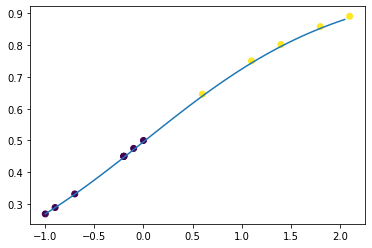

In [18]:
plt.plot(np.linspace(-1,2.05), sig_data)
plt.scatter(np.dot(X1,w), sig(np.dot(X1,w)), c=Y)
plt.show()

De esta forma, los puntos más cercanos a 0 tenderán a tener una prbabilidad cercana a $0.5$. De tal forma que podemos reformular la función de desción del perceptrón de la forma siguiente:

$$f_\sigma(x; \theta) = \begin{cases} 1 & \text{ si } \sigma(wx + b) \leq 0.5 \\ 0 & \text{ si } \sigma(wx) + b < 0.5\end{cases}$$

Está función tendrá los mismos resultados que la función rígida de desición. Pero esta función tiene la ventaja de ser derivable, por lo que se podrán utilizar métodos de optimización basadas en gradiente. Por tanto, en adelante ocuparemos funciones de este tipo y no rígidas como las del perceptrón.

Finalmente, podemos ver las prbabilidades para cada ejemplo:

In [19]:
data['p(gato|X)'] = sig(np.dot(X1,w))
data

,¿es animal?,¿es mamífero?,¿es felino?,¿es doméstico?,¿tiene dos orejas?,¿es negro?,¿tiene cuatro patas?,¿es gato?,p(gato|X)
0,1,1,1,1,1,1,1,1,0.645656
1,0,0,0,1,0,1,0,0,0.450166
2,1,0,1,1,0,1,1,0,0.450166
3,1,1,0,1,1,0,1,0,0.500000
4,1,1,1,0,1,0,1,0,0.450166
5,1,1,1,1,0,0,0,1,0.890903
6,1,0,0,1,1,1,0,0,0.289050
7,1,1,1,1,0,0,1,1,0.802184
8,1,0,0,1,0,0,0,0,0.475021
9,0,0,0,0,0,0,0,0,0.268941
